# Prospeção de Dados 2021/2022
## Third Home Assignment - Best Rules and Maximal Itemsets Identification
### Group 4
Students
- Catarina Canastra, nº57766
- Daniel Dias, nº59056
- João Raimundo, nº57454

### 0.1 - Import Libraries and Packages

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

import mlxtend.frequent_patterns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth

# config plot
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

### 0.2 - Load Dataset

In [3]:
def load_transactions (file_name, sep=","):
#input: csv file with one transaction per line,
#           where transactions may have a different number of items
#    output: matrix where each row is a vector of items (transaction)
#    author: Sara C. Madeira, Oct 2017
    lines = open(file_name, 'rt').readlines()
    transactions_matrix = []
    for l in lines:
        l = l.rstrip('\n')
        transaction = l.split(sep)
        transactions_matrix.append(transaction)
    return transactions_matrix

transactions=load_transactions("Online_Retail.txt", sep="\t")

In [4]:
transactions

[['CREAM CUPID HEARTS COAT HANGER',
  'GLASS STAR FROSTED T-LIGHT HOLDER',
  'KNITTED UNION FLAG HOT WATER BOTTLE',
  'RED WOOLLY HOTTIE WHITE HEART.',
  'SET 7 BABUSHKA NESTING BOXES',
  'WHITE HANGING HEART T-LIGHT HOLDER',
  'WHITE METAL LANTERN',
  'country:United Kingdom',
  'month:01'],
 ['HAND WARMER RED POLKA DOT',
  'HAND WARMER UNION JACK',
  'country:United Kingdom',
  'month:01'],
 ['ASSORTED COLOUR BIRD ORNAMENT',
  'BOX OF 6 ASSORTED COLOUR TEASPOONS',
  'BOX OF VINTAGE ALPHABET BLOCKS',
  'BOX OF VINTAGE JIGSAW BLOCKS',
  'DOORMAT NEW ENGLAND',
  'FELTCRAFT PRINCESS CHARLOTTE DOLL',
  'HOME BUILDING BLOCK WORD',
  'IVORY KNITTED MUG COSY',
  'LOVE BUILDING BLOCK WORD',
  "POPPY'S PLAYHOUSE BEDROOM",
  "POPPY'S PLAYHOUSE KITCHEN",
  'RECIPE BOX WITH METAL HEART',
  'country:United Kingdom',
  'month:01'],
 ['BLUE COAT RACK PARIS FASHION',
  'JAM MAKING SET WITH JARS',
  'RED COAT RACK PARIS FASHION',
  'YELLOW COAT RACK PARIS FASHION',
  'country:United Kingdom',
  'month

In [5]:
#Check the number of transactions
len(transactions)

24388

### 0.3 - Data Preparation/Preprocessing

Creating a list of sets from the dataset allows us to easily find elements since it is not necessary to go through the entire dataset, just ask small questions. So, we can know for each element that we are looking for in how many transactions it is found.

In [6]:
tr_sets=[set(tr) for tr in transactions]

#### Binary database

In [7]:
# Compute binary database (transactions X products )
tr_enc = TransactionEncoder()
trans_array = tr_enc.fit(transactions).transform(transactions)
binary_database = pd.DataFrame(trans_array, columns=tr_enc.columns_)
binary_database

"ACRYLIC HANGING JEWEL,BLUE"  "ACRYLIC HANGING JEWEL,PINK"  "ACRYLIC JEWEL ANGEL,PINK"  "ACRYLIC JEWEL ICICLE, BLUE"  "ACRYLIC JEWEL ICICLE, PINK"  "ACRYLIC JEWEL SNOWFLAKE, PINK"  "ACRYLIC JEWEL SNOWFLAKE,PINK"  "AIRLINE LOUNGE,METAL SIGN"  "ART LIGHTS,FUNK MONKEY"  "ASSORTED FLOWER COLOUR ""LEIS"""  "BATHROOM SCALES, TROPICAL BEACH"  "BIRTHDAY CARD, RETRO SPOT"  "BLACK TEA,COFFEE,SUGAR JARS"  "BREAD BIN, DINER STYLE, IVORY"  "BREAD BIN, DINER STYLE, MINT"  "BUNTING , SPOTTY "  "CAKESTAND, 3 TIER, LOVEHEART"  "CHARLIE+LOLA""EXTREMELY BUSY"" SIGN"  "CHRISTMAS GARLAND STARS,TREES"  "DECORATION , WOBBLY CHICKEN, METAL "  "DECORATION , WOBBLY RABBIT , METAL "  "DECORATION HEN ON NEST, HANGING"  "DECOUPAGE,GREETING CARD,"  "DIAMANTE HEART SHAPED WALL MIRROR, "  "ELEPHANT, BIRTHDAY CARD, "  "FANCY FONT BIRTHDAY CARD, "  "FEATHER PEN,COAL BLACK"  "FEATHER PEN,HOT PINK"  "FEATHER PEN,LIGHT PINK"  "FLOWER FAIRY,5 SUMMER B'DRAW LINERS"  "FLOWER GLASS GARLAND NECKL.36""BLACK"  "FLOWER GLASS GARLAND NECKL.36""BLUE"  "FLOWER GLASS GARLAND NECKL.36""GREEN"  "FLOWER GLASS GARLD NECKL36""AMETHYST"  "FLOWER GLASS GARLD NECKL36""TURQUOIS"  "FOLK ART GREETING CARD,pack/12"  "FOOD COVER WITH BEADS , SET 2 SIZES"  "GARLAND, MAGIC GARDEN 1.8M"  "GARLAND, VINTAGE BELLS"  "GREETING CARD, OVERCROWDED POOL."  "GREETING CARD, STICKY GORDON"  "GREETING CARD, TWO SISTERS."  "GREETING CARD,SQUARE, DOUGHNUTS"  "HOOK, 1 HANGER ,MAGIC GARDEN"  "KEY FOB , BACK DOOR "  "KEY FOB , FRONT  DOOR "  "KEY FOB , GARAGE DESIGN"  "KEY FOB , SHED"  "LARGE CAKE TOWEL, CHOCOLATE SPOTS"  "LETTER ""A"" BLING KEY RING"  "LETTER ""B"" BLING KEY RING"  "LETTER ""C"" BLING KEY RING"  "LETTER ""D"" BLING KEY RING"  "LETTER ""E"" BLING KEY RING"  "LETTER ""F"" BLING KEY RING"  "LETTER ""G"" BLING KEY RING"  "LETTER ""H"" BLING KEY RING"  "LETTER ""I"" BLING KEY RING"  "LETTER ""J"" BLING KEY RING"  "LETTER ""K"" BLING KEY RING"  "LETTER ""L"" BLING KEY RING"  "LETTER ""M"" BLING KEY RING"  "LETTER ""N"" BLING KEY RING"  "LETTER ""O"" BLING KEY RING"  "LETTER ""P"" BLING KEY RING"  "LETTER ""R"" BLING KEY RING"  "LETTER ""S"" BLING KEY RING"  "LETTER ""T"" BLING KEY RING"  "LETTER ""U"" BLING KEY RING"  "LETTER ""V"" BLING KEY RING"  "LETTER ""W"" BLING KEY RING"  "LETTER ""Y"" BLING KEY RING"  "LETTER ""Z"" BLING KEY RING"  "MERCHANT CHANDLER CREDIT ERROR, STO"  "METAL SIGN,CUPCAKE SINGLE HOOK"  "MUG , DOTCOMGIFTSHOP.COM "  "NURSERY A,B,C PAINTED LETTERS"  "PAPER CRAFT , LITTLE BIRDIE"  "PEARL & SHELL 42""NECKL. GREEN"  "PEARL & SHELL 42""NECKL. IVORY"  "PET MUG, GOLDFISH"  "PINK/WHITE ""KEEP CLEAN"" BULLET BIN"  "POCKET MIRROR ""GLAMOROUS"""  "RECORD FRAME 7"" SINGLE SIZE "  "RETRO ""TEA FOR ONE"" "  "RETRO PILL BOX , REVOLUTIONARY"  "RETRO PILL BOX KEY CHAIN,THE KING"  "RETRO TIN ASHTRAY,REVOLUTIONARY"  "RUBY GLASS NECKLACE 42"""  "RUSTIC WOODEN CABINET, GLASS DOORS"  "S/4 ICON COASTER,ELVIS LIVES"  "SET 3 RETROSPOT TEA,COFFEE,SUGAR"  "SILICON CUBE 25W, BLUE"  "SMALL POP BOX,FUNKY MONKEY"  "STRING OF 8 BUTTERFLIES,PINK"  "SWISS ROLL TOWEL, CHOCOLATE  SPOTS"  "SWISS ROLL TOWEL, PINK  SPOTS"  "TRAY, BREAKFAST IN BED"  "TUMBLER, BAROQUE"  "TUMBLER, NEW ENGLAND"  "Unsaleable, destroyed."  "WALL ART , LOVES' SECRET "  "WALL ART , THE MAGIC FOREST "  "WALL ART ,PUDDINGS "  "WALL ART,ONLY ONE PERSON "  "WHITE TEA,COFFEE,SUGAR JARS"  "WRAP, BILLBOARD FONTS DESIGN"  "WRAP, CAROUSEL"  "mouldy, thrown away."  "mouldy, unsaleable."  *Boombox Ipod Classic  *USB Office Mirror Ball  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  12 DAISY PEGS IN WOOD BOX  12 EGG HOUSE PAINTED WOOD  12 HANGING EGGS HAND PAINTED  12 IVORY ROSE PEG PLACE SETTINGS  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  12 PENCILS TALL TUBE SKULLS  12 PENCILS TALL TUBE WOODLAND  12 PINK HEN+CHICKS IN BASKET  12 PINK ROSE PEG PLACE SETTINGS  12 RED ROSE PEG PLACE SETTINGS  1

## Objective 1 - Identify the most relevant Rules (max: 10)

1. Minimum support is applied to find all frequent itemsets (minimum support itemsets) in a data set.
2. These frequent itemsets and the minimum confidence constraint are used to compose the rules.

**Notes:**
- Summarily describe the procedure followed
- Justify your criteria for selecting those rules
- Identify the rules, list them and comment uppon them
- Discuss the performance of the selected approach for finding relevant itemsets

#### FP-growth

For this analysis we we'll make use of the FP-growth algorithm as it is faster and more efficient than apriori as we have seen in previous classes.

In [12]:
fpGrowth_min_sups=np.array([0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01])
n_itemsets=[]
for ms in fpGrowth_min_sups:
    FI = fpgrowth(binary_database, min_support=ms, use_colnames=True)
    n=FI.shape[0]
    print(ms, "---->", n)
    n_itemsets.append(n)

0.09 ----> 3
0.08 ----> 6
0.07 ----> 7
0.06 ----> 11
0.05 ----> 23
0.04 ----> 70
0.03 ----> 191
0.02 ----> 496
0.01 ----> 2271


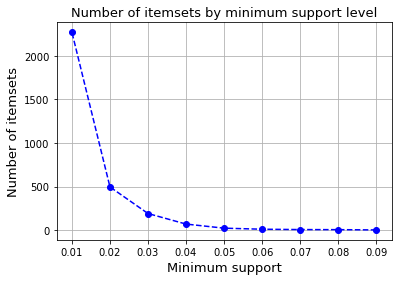

In [14]:
#simple direct plot
plt.plot(fpGrowth_min_sups, n_itemsets, '--bo')
plt.title('Number of itemsets by minimum support level', fontsize=13)
plt.xlabel('Minimum support', fontsize=13)
plt.ylabel('Number of itemsets', fontsize=13)
plt.grid()
plt.show()

In [15]:
FI_fpgrowth = fpgrowth(binary_database, min_support=0.03, use_colnames=True)
FI_fpgrowth

,support,itemsets
0,0.901345,(country:United Kingdom)
1,0.094391,(WHITE HANGING HEART T-LIGHT HOLDER)
2,0.037436,(month:01)
3,0.060153,(ASSORTED COLOUR BIRD ORNAMENT)
4,0.032270,(HOME BUILDING BLOCK WORD)
...,...,...
186,0.037231,"(GARDENERS KNEELING PAD KEEP CALM, country:United Kingdom)"
187,0.031040,"(GARDENERS KNEELING PAD CUP OF TEA, country:United Kingdom)"
188,0.030712,"(country:United Kingdom, SET OF 3 REGENCY CAKE TINS)"
189,0.031901,"(POPCORN HOLDER, country:United Kingdom)"


Due to the observed results, we decided to analyze the itemsets without the `country:United Kingdom` item.
Since we deemed it irrelevant to the analysis as it was present in most of the itemsets.

In [19]:
dt = binary_database.copy(deep=True).drop('country:United Kingdom', axis=1)
FI_fpgrowth = fpgrowth(dt, min_support=0.02, use_colnames=True)
FI_fpgrowth['length'] = FI_fpgrowth['itemsets'].apply(lambda x: len(x))
FI_fpgrowth.sort_values(by=['support'], ascending=False)

,support,itemsets,length
0,0.094391,(WHITE HANGING HEART T-LIGHT HOLDER),1
119,0.088937,(REGENCY CAKESTAND 3 TIER),1
53,0.087543,(JUMBO BAG RED RETROSPOT),1
165,0.069952,(PARTY BUNTING),1
23,0.065893,(LUNCH BAG RED RETROSPOT),1
...,...,...,...
241,0.020092,"(RED RETROSPOT CHARLOTTE BAG, STRAWBERRY CHARLOTTE BAG)",2
269,0.020092,"(LUNCH BAG RED RETROSPOT, LUNCH BAG APPLE DESIGN)",2
158,0.020051,(SET/3 RED GINGHAM ROSE STORAGE BOX),1
227,0.020051,(PANTRY MAGNETIC SHOPPING LIST),1


In [23]:
FI_fpgrowth_filtered = FI_fpgrowth[ (FI_fpgrowth['support'] >= 0.025) & (FI_fpgrowth['length'] >= 2)]
FI_fpgrowth_filtered

,support,itemsets,length
232,0.026488,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKELIKE RED)",2
236,0.034156,"(JUMBO BAG RED RETROSPOT, JUMBO BAG PINK POLKADOT)",2
238,0.030056,"(JUMBO BAG RED RETROSPOT, JUMBO STORAGE BAG SUKI)",2
242,0.028006,"(JUMBO BAG RED RETROSPOT, JUMBO SHOPPER VINTAGE RED PAISLEY)",2
248,0.025135,"(LUNCH BAG RED RETROSPOT, LUNCH BAG PINK POLKADOT)",2
252,0.026570,"(LUNCH BAG RED RETROSPOT, LUNCH BAG BLACK SKULL.)",2
258,0.032147,"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENCY TEACUP AND SAUCER)",2
264,0.026406,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER)",2
265,0.025176,"(ROSES REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER)",2


In [35]:
all_rules = association_rules(FI_fpgrowth, metric="confidence", min_threshold=0.45)
all_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.041045,0.044325,0.026488,0.645355,14.559583,0.024669,2.694734
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.044325,0.041045,0.026488,0.597595,14.559583,0.024669,2.383059
2,(WOODEN FRAME ANTIQUE WHITE),(WOODEN PICTURE FRAME WHITE FINISH),0.040471,0.045842,0.022347,0.552178,12.045192,0.020492,2.130665
3,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE),0.045842,0.040471,0.022347,0.487478,12.045192,0.020492,1.872171
4,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.030917,0.094391,0.020502,0.663130,7.025375,0.017584,2.688305
5,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.050476,0.087543,0.034156,0.676686,7.729747,0.029737,2.822197
6,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.049246,0.087543,0.030056,0.610325,6.971709,0.025745,2.341583
7,(JUMBO BAG BAROQUE BLACK WHITE),(JUMBO BAG RED RETROSPOT),0.038831,0.087543,0.024315,0.626188,7.152914,0.020916,2.440951
8,(JUMBO BAG PINK VINTAGE PAISLEY),(JUMBO BAG RED RETROSPOT),0.035960,0.087543,0.021404,0.595211,6.799065,0.018256,2.254154
9,(RED RETROSPOT CHARLOTTE BAG),(STRAWBERRY CHARLOTTE BAG),0.043054,0.030097,0.020092,0.466667,15.505540,0.018796,1.818569


By observing the generated rules we attempted to find a middleground between support and confidence values in order to select the best available rules.

After trying multiple values, we reached the final rules.

In [49]:
rules = all_rules[(all_rules['support'] >= 0.025) & (all_rules['confidence'] >= 0.55)]
rules = rules.sort_values(by=['confidence'], ascending=False).head(10)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
37,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.032844,0.043341,0.026406,0.803995,18.550454,0.024983,4.880789
39,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.032844,0.045924,0.025176,0.766542,16.691448,0.023668,4.086710
27,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.043341,0.045924,0.032147,0.741722,16.150993,0.030157,3.693986
26,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.045924,0.043341,0.032147,0.700000,16.150993,0.030157,3.188863
5,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.050476,0.087543,0.034156,0.676686,7.729747,0.029737,2.822197
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.041045,0.044325,0.026488,0.645355,14.559583,0.024669,2.694734
6,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.049246,0.087543,0.030056,0.610325,6.971709,0.025745,2.341583
36,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.043341,0.032844,0.026406,0.609272,18.550454,0.024983,2.475264
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.044325,0.041045,0.026488,0.597595,14.559583,0.024669,2.383059
11,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.048671,0.087543,0.028006,0.575400,6.572768,0.023745,2.148981
